In [67]:
#Importing libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [68]:
#Reading file, splitting train test
df = pd.read_pickle('treated_dataset.pkl')
df = pd.get_dummies(df, drop_first=True)
train = df[df.Survived!=2]
test = df[df.Survived==2]
test.drop('Survived', axis=1, inplace=True)

C:\Users\Prueba\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [69]:
#Splitting train-test the labeled dataset
y = train['Survived']
X = train.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [70]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

**Scoring and cross validation**

In [71]:
rf.score(X_train,y_train)

0.9819819819819819

In [72]:
rf.score(X_test, y_test)

0.7757847533632287

In [73]:
cross_val_score(rf, X, y, cv=10)

array([0.82022472, 0.82022472, 0.75280899, 0.86516854, 0.86516854,
       0.85393258, 0.85393258, 0.7752809 , 0.85393258, 0.78409091])

**Feature importance**

<AxesSubplot:xlabel='importance', ylabel='feature'>

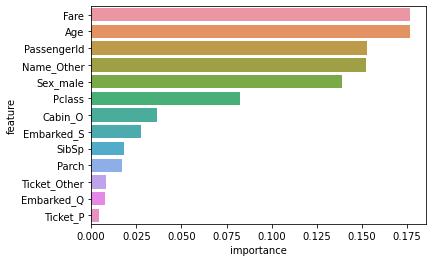

In [74]:
features = pd.DataFrame({'feature':X.columns, 'importance': rf.feature_importances_})
features.sort_values('importance', ascending=False, inplace=True)
sns.barplot(y='feature', x='importance', data=features)

**Submission**

In [75]:
predictions = rf.predict(test)

In [76]:
submission_file = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})

In [77]:
submission_file.to_csv('rf_predictions.csv', index=False)

Score 0.75119